In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 

c:\Users\Aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Data

In [2]:
crop = pd.read_csv("house_crops.csv")
crop.head()

,Plant,N,P,K,Temperature,Humidity,pH
0,Mango,2.1,0.6,2.2,27,73,6.8
1,Mango,2.2,0.7,2.0,28,75,6.5
2,Mango,2.0,0.5,2.3,26,70,7.2
3,Mango,2.3,0.6,2.2,29,72,6.7
4,Mango,2.1,0.5,2.1,27,73,6.9


# Ask Six Question to yourself

In [3]:
crop.shape

(1393, 7)

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Plant        1393 non-null   object 
 1   N            1393 non-null   float64
 2   P            1393 non-null   float64
 3   K            1393 non-null   float64
 4   Temperature  1393 non-null   int64  
 5   Humidity     1393 non-null   int64  
 6   pH           1393 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 76.3+ KB


In [5]:
crop.isnull().sum()

Plant          0
N              0
P              0
K              0
Temperature    0
Humidity       0
pH             0
dtype: int64

In [6]:
crop.duplicated().sum()

1283

In [7]:
crop.describe()

,N,P,K,Temperature,Humidity,pH
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000
mean,1.545607,0.617186,1.351393,24.139986,64.938263,6.509620
std,0.586454,0.234493,0.560294,3.510217,8.781212,0.305753
min,0.180000,0.060000,0.140000,17.000000,38.000000,5.600000
25%,1.200000,0.500000,1.000000,21.000000,61.000000,6.300000
50%,1.600000,0.600000,1.300000,25.000000,66.000000,6.500000
75%,2.000000,0.800000,1.800000,27.000000,72.000000,6.700000
max,2.600000,1.100000,2.300000,30.000000,76.000000,7.200000


In [12]:
# label_encoder = preprocessing.LabelEncoder()
# crop['label'] = label_encoder.fit_transform(crop['label'])
# crop

# Exploring Data

In [13]:
# corr = crop.corr()
# corr

In [8]:
import seaborn as sns
# sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [9]:
crop['Plant'].value_counts()

Plant
Spinach                132
Basil                  114
Fenugreek              108
Organic Taro Leaves    102
Jasmine                 99
Green Chilli            99
Carrot                  93
Mango                   89
Aloevera                88
Radish                  84
Mud Apple               81
Rose                    66
Lemon                   66
Curry Leaves            64
Coriander               54
Tomato                  54
Name: count, dtype: int64

C:\Users\Aditi\AppData\Local\Temp\ipykernel_15172\396239346.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


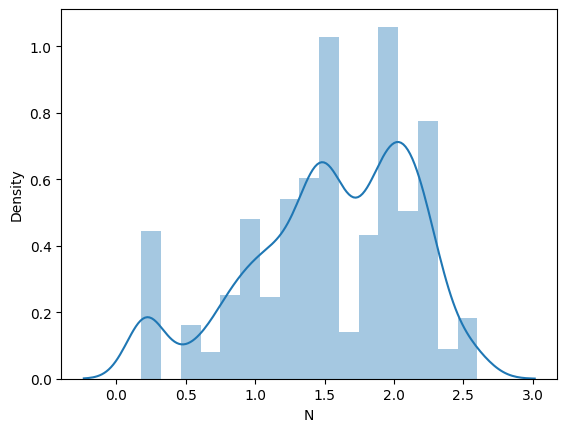

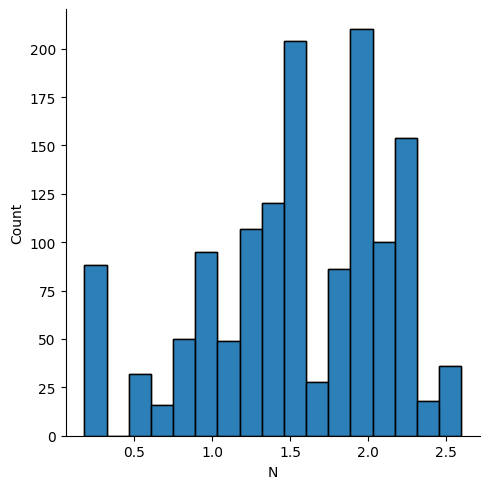

In [10]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
sns.displot(crop['N'])
sns.histplot(crop['N'])
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
crop['crop_num'] = label_encoder.fit_transform(crop['Plant'])


# Encoding

In [ ]:
# crop_dict = {
#     'rice': 1,
#     'maize': 2,
#     'jute': 3,
#     'cotton': 4,
#     'coconut': 5,
#     'papaya': 6,
#     'orange': 7,
#     'apple': 8,
#     'muskmelon': 9,
#     'watermelon': 10,
#     'grapes': 11,
#     'mango': 12,
#     'banana': 13,
#     'pomegranate': 14,
#     'lentil': 15,
#     'blackgram': 16,
#     'mungbean': 17,
#     'mothbeans': 18,
#     'pigeonpeas': 19,
#     'kidneybeans': 20,
#     'chickpea': 21,
#     'coffee': 22
# }
# crop['crop_num']=crop['label'].map(crop_dict)

In [12]:
crop['crop_num'].value_counts()

crop_num
14    132
1     114
5     108
11    102
7      99
6      99
2      93
9      89
0      88
12     84
10     81
13     66
8      66
4      64
3      54
15     54
Name: count, dtype: int64

In [13]:
# crop.drop(['label'],axis=1,inplace=True)
crop.sample(5)


,Plant,N,P,K,Temperature,Humidity,pH,crop_num
179,Aloevera,0.23,0.08,0.17,26,41,6.8,0
6,Mango,2.00,0.60,2.30,26,71,6.8,9
699,Coriander,1.40,0.80,1.20,26,61,6.7,3
294,Curry Leaves,0.80,0.50,0.70,30,68,5.8,4
789,Spinach,2.20,0.70,2.00,20,67,6.9,14


# Train Test Split

In [14]:
X = crop.drop(['crop_num','Plant'],axis=1)
y = crop['crop_num']

In [15]:
X.head()

,N,P,K,Temperature,Humidity,pH
0,2.1,0.6,2.2,27,73,6.8
1,2.2,0.7,2.0,28,75,6.5
2,2.0,0.5,2.3,26,70,7.2
3,2.3,0.6,2.2,29,72,6.7
4,2.1,0.5,2.1,27,73,6.9


In [16]:
X.shape

(1393, 6)

In [17]:
y.shape

(1393,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(1114, 6)

In [21]:
X_test.shape

(279, 6)

In [22]:
X_train

,N,P,K,Temperature,Humidity,pH
312,1.3,0.5,1.1,26,61,6.1
1326,1.6,0.7,1.4,19,66,6.8
770,2.1,0.6,1.9,19,66,6.7
1345,1.5,0.6,1.3,18,65,6.6
985,1.8,0.4,1.5,22,65,6.2
...,...,...,...,...,...,...
1095,2.3,1.0,2.1,29,76,6.7
1130,1.4,0.6,1.1,19,59,6.3
1294,1.8,0.9,1.7,24,66,6.5
860,2.1,0.6,1.9,19,66,6.8



# Scale the features using MinMaxScaler

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()

# X_train = ms.fit_transform(X_train)
# X_test = ms.transform(X_test)

In [23]:
X_train

,N,P,K,Temperature,Humidity,pH
312,1.3,0.5,1.1,26,61,6.1
1326,1.6,0.7,1.4,19,66,6.8
770,2.1,0.6,1.9,19,66,6.7
1345,1.5,0.6,1.3,18,65,6.6
985,1.8,0.4,1.5,22,65,6.2
...,...,...,...,...,...,...
1095,2.3,1.0,2.1,29,76,6.7
1130,1.4,0.6,1.1,19,59,6.3
1294,1.8,0.9,1.7,24,66,6.5
860,2.1,0.6,1.9,19,66,6.8


# Standarization

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()


# sc.fit(X_train)
# X_train = sc.transform(X_train)
# X_test = sc.transform(X_test)

In [24]:
X_train

,N,P,K,Temperature,Humidity,pH
312,1.3,0.5,1.1,26,61,6.1
1326,1.6,0.7,1.4,19,66,6.8
770,2.1,0.6,1.9,19,66,6.7
1345,1.5,0.6,1.3,18,65,6.6
985,1.8,0.4,1.5,22,65,6.2
...,...,...,...,...,...,...
1095,2.3,1.0,2.1,29,76,6.7
1130,1.4,0.6,1.1,19,59,6.3
1294,1.8,0.9,1.7,24,66,6.5
860,2.1,0.6,1.9,19,66,6.8


# Training Models

In [25]:
# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    # 'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    # 'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    # 'AdaBoost': AdaBoostClassifier(),
    # 'Gradient Boosting': GradientBoostingClassifier(),
    # 'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Naive Bayes  with accuracy : 0.985663082437276
Support Vector Machine  with accuracy : 0.36917562724014336
K-Nearest Neighbors  with accuracy : 1.0
Decision Tree  with accuracy : 1.0
Random Forest  with accuracy : 1.0
Bagging  with accuracy : 1.0


In [26]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
print(X_test)
accuracy_score(y_test,ypred)

        N     P     K  Temperature  Humidity   pH
322   1.2  0.40  1.00           25        60  5.9
1105  1.5  0.70  1.20           20        60  6.5
977   1.9  0.50  1.60           23        66  6.7
526   0.9  0.50  0.70           25        75  6.2
636   1.2  0.60  1.00           29        76  7.0
...   ...   ...   ...          ...       ...  ...
461   1.4  0.70  1.20           27        54  6.4
48    2.1  0.60  2.20           27        73  6.7
155   0.2  0.07  0.15           26        40  6.5
342   1.3  0.50  1.10           26        61  6.1
1065  2.3  1.00  2.10           29        76  6.7

[279 rows x 6 columns]


1.0

# Predictive System

In [27]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    # transformed_features = ms.fit_transform(features)
    # transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(features).reshape(1,-1)
    print(prediction)
    return prediction[0] 

In [ ]:

# def recommendation(N,P,k,temperature,humidity,ph,rainfall):
#     features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
#     print(features)
#     # transformed_features1 = ms.transform(features)
#     # transformed_features = sc.fit_transform(features)
#     # print(transformed_features)
#     prediction = rfc.predict(features).reshape(1,-1)
#     print(prediction)
#     return prediction[0] 

# N , P , K , temperature , humidity , ph , rainfall = 67,   45,   38,    22.727910,  82.170688,  7.300411,  260.887506
# predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)


# crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
#                  8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
#                  14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
#                  19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

# if predict[0] in crop_dict:
#     crop = crop_dict[predict[0]]
#     print("{} is the best crop to be cultivated ".format(crop))
# else:
#     print("Sorry are not able to recommend a proper crop for this environment")

[[ 67.        45.        38.        22.72791   82.170688   7.300411
  260.887506]]
[[1]]
Rice is the best crop to be cultivated 


c:\Users\Aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'crop' is your DataFrame and 'label' is the column to be encoded
label_encoder = LabelEncoder()
crop['crop_num'] = label_encoder.fit_transform(crop['Plant'])

# Define your features and target variable
X = crop[['N', 'P', 'K', 'Temperature', 'Humidity', 'pH']]
y = crop['crop_num']

# Create and train the Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X, y)

def recommendation(N, P, K, Temperature, Humidity, pH):
    features = np.array([[N, P, K, Temperature, Humidity, pH]])
    predicted_crop_num = rfc.predict(features).item()  # Use item() to get the single value from the array
    return predicted_crop_num

# Input values
N, P, K, temperature, humidity, ph = 2.2, 0.7, 2, 28, 75,7.2

# Get the predicted crop number
predicted_crop_num = recommendation(N, P, K, temperature, humidity, ph )

# Check if the predicted crop number is within the range of label encoding
if 0 <= predicted_crop_num < len(label_encoder.classes_):
    recommended_crop = label_encoder.classes_[predicted_crop_num]
    print("{} is the best crop to be cultivated.".format(recommended_crop))
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")


Mango is the best crop to be cultivated.


c:\Users\Aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
# pickle.dump(ms,open('minmaxscaler.pkl','wb'))
# pickle.dump(sc,open('standscaler.pkl','wb'))

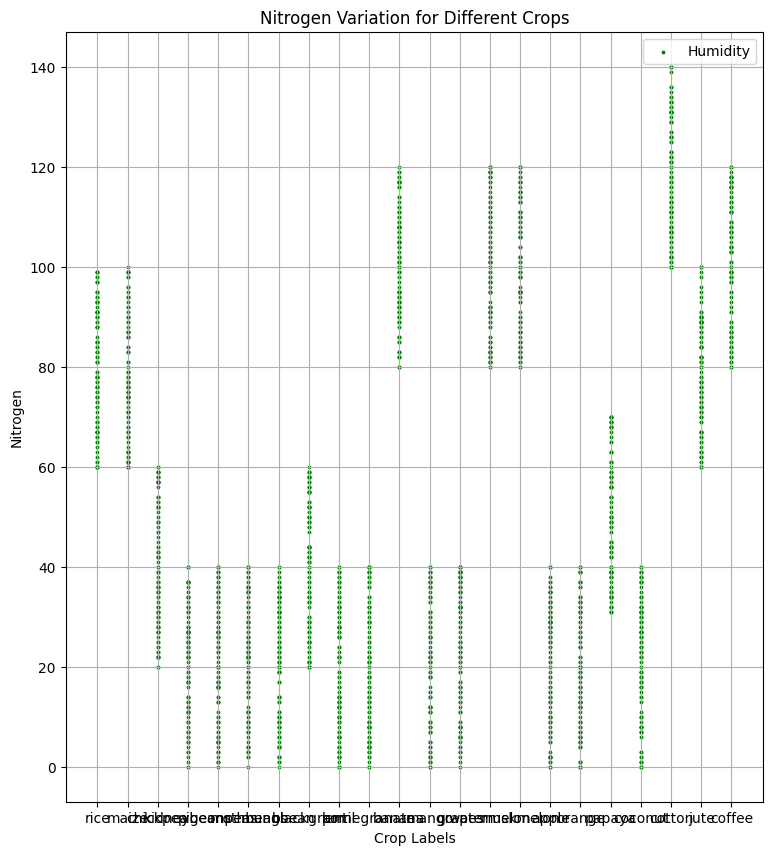

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is in a file named 'your_dataset.csv'
# Adjust the file path accordingly
file_path = 'crop_recommendation.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Extracting humidity and corresponding labels from the DataFrame
humidity = df['N'].tolist()
labels = df['label'].tolist()
plt.figure(figsize=(9, 10))  # Adjust the width and height as needed

# Plotting the scatter plot
plt.scatter(labels, humidity, color='g', label='Humidity',s=3)
plt.xlabel('Crop Labels')
plt.ylabel('Nitrogen')
plt.title('Nitrogen Variation for Different Crops')
plt.legend()
plt.grid(True)
plt.show()


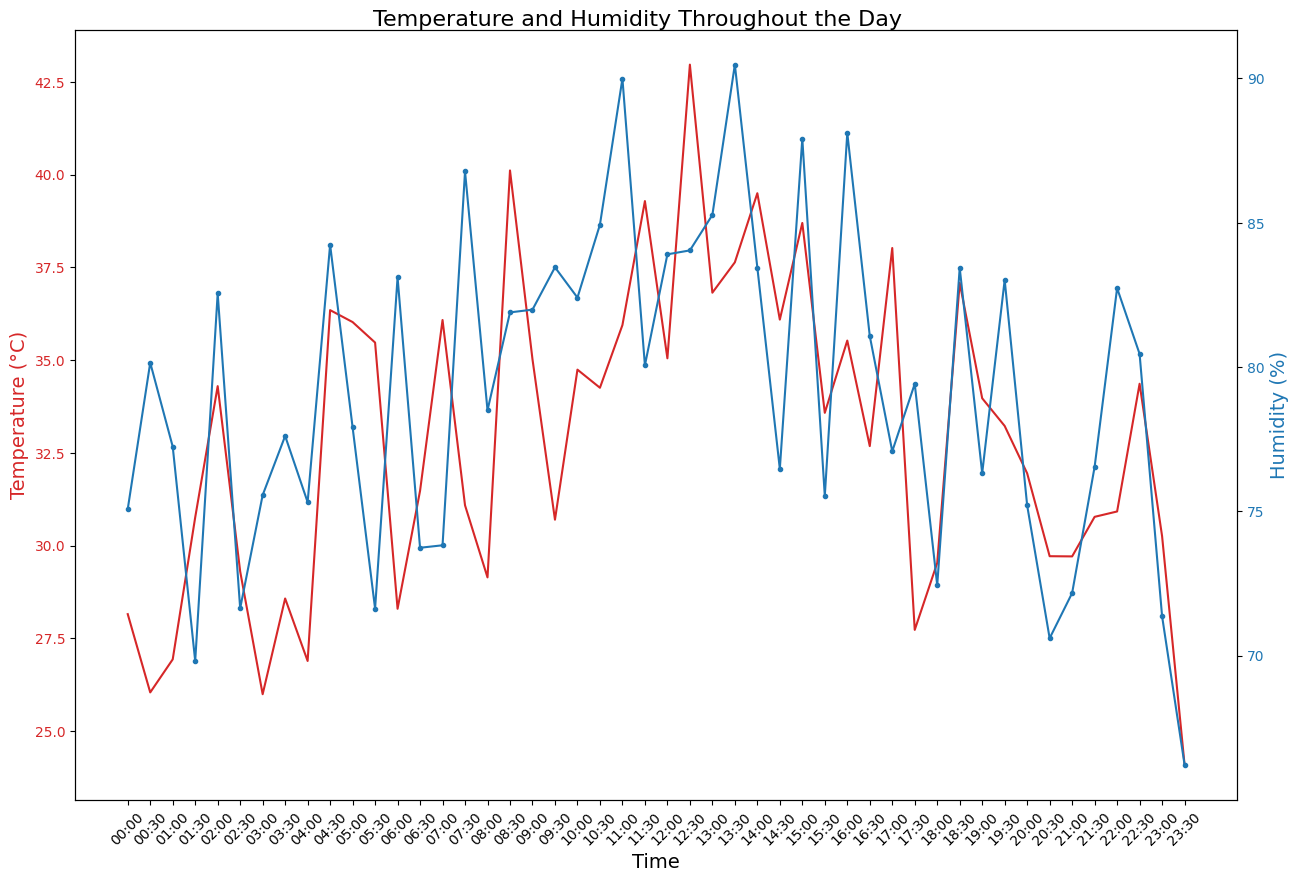

In [ ]:
import random
import matplotlib.pyplot as plt

def generate_temperature_and_humidity_data(num_points=48, min_temp=21, max_temp=33, min_humidity=65, max_humidity=81):
    # Generate time points for a day (48 half-hour intervals)
    time_points = [f'{hour:02d}:{minute:02d}' for hour in range(24) for minute in [0, 30]]

    # Generate temperatures for each time point
    temperatures = []
    for i in range(num_points):
        temp = random.uniform(min_temp, max_temp)

        # Gradually increase until noon and then decrease
        if i < 24:
            temp += i * 0.5  # Increase until noon
        else:
            temp += (24 - (i - 24)) * 0.5  # Decrease after noon
        temperatures.append(temp)

    # Generate humidity for each time point
    humidity = []
    for i in range(num_points):
        hum = random.uniform(min_humidity, max_humidity)

        # Gradually increase until noon and then decrease
        if i < 24:
            hum += i * 0.5  # Increase until noon
        else:
            hum += (24 - (i - 24)) * 0.5  # Decrease after noon
        humidity.append(hum)

    return time_points, temperatures, humidity

def plot_temperature_and_humidity_data(time_points, temperatures, humidity, figure_width=10):
    # Calculate the aspect ratio based on the number of time points
    aspect_ratio = len(time_points) / 6

    # Adjust the width of the figure and maintain the aspect ratio
    fig, ax1 = plt.subplots(figsize=(figure_width, 10))

    # Plot temperature on the primary y-axis
    ax1.plot(time_points, temperatures, label='Temperature (°C)', color='tab:red')
    ax1.set_xlabel('Time', fontsize=14)  # Adjust font size
    ax1.set_ylabel('Temperature (°C)', color='tab:red', fontsize=14)  # Adjust font size
    ax1.tick_params(axis='y', labelcolor='tab:red')
    
    # Show every time point for clarity
    ax1.set_xticks(time_points)
    ax1.tick_params(axis='x', labelrotation=45, labelsize=10)  # Adjust font size and rotation for x-axis labels

    # Create a secondary y-axis for humidity
    ax2 = ax1.twinx()
    ax2.plot(time_points, humidity, marker='.', label='Humidity (%)', color='tab:blue')
    ax2.set_ylabel('Humidity (%)', color='tab:blue', fontsize=14)  # Adjust font size
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    fig.suptitle('Temperature and Humidity Throughout the Day', fontsize=16, y=0.9)  # Adjust font size and placement for title
    plt.show()

if __name__ == "__main__":
    num_points = 48  # 24 hours with half-hour intervals
    min_temp = 21
    max_temp = 33
    min_humidity = 65
    max_humidity = 81

    time_points, temperatures, humidity = generate_temperature_and_humidity_data(
        num_points, min_temp, max_temp, min_humidity, max_humidity
    )
    plot_temperature_and_humidity_data(time_points, temperatures, humidity, figure_width=15)
